# **Modeling hetrogeneous population landscapes from Soneira peebles model and power-law probability distribution**

**Packages**

In [73]:
import numpy as np
import matplotlib.pyplot as plt

**Parameters**

In [74]:
R = 1  ### Radius for the main population
eta = 2 ### startign sites in first layer
df = 1.2 ### fractal dimension
L = 10 #### number of layers

**Algorithm**

In [75]:
#### Generate a set of sites

def generate_fractal_sites(df, eta, R, L):

    # Calculate contraction factor
    lambda_factor = eta**(1/df)

    # Initialize the first layer
    sites = [(0, 0)]  # Start with the origin

    # Generate points layer by layer
    for layer in range(L):
        new_sites = []
        for x, y in sites:
            for i in range(eta):
                # Generate a random point within a circle
                angle = np.random.uniform(0, 2 * np.pi)
                radius = np.random.uniform(0, R / (lambda_factor**layer))
                new_x = x + radius * np.cos(angle)
                new_y = y + radius * np.sin(angle)
                new_sites.append((new_x, new_y))
        sites = new_sites

    return sites



In [76]:
#### Split into x and y cordinates
data = generate_fractal_sites(df, eta, R, L)

x = []
y = []

for i in range(0,len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

In [77]:
### circle of the first layer

t = np.linspace(0,2*np.pi,100)
cx = R*np.cos(t)
cy = R*np.sin(t)


In [78]:
#### Generate random population for sites from power-low distribution

beta = 3  ### population exponent
m0 = 100  ### lower bound of population
num_sites = len(x)  ### number of sites

population = []

def generate_populations(num_sites, beta, m0):

    # Generate uniform random numbers
    u = np.random.uniform(0, 1, size=num_sites)

    # Transform using the inverse CDF of the power-law distribution
    populations = m0 * (1 - u) ** (-1 / (beta - 1))

    return populations

In [79]:

#### Normalized population

populations = generate_populations(num_sites, beta, m0)
max_p = max(populations)

normalized_population = []

for i in range(0,len(x)):
  normalized_population.append(populations[i]/max_p)


**(b) Results**

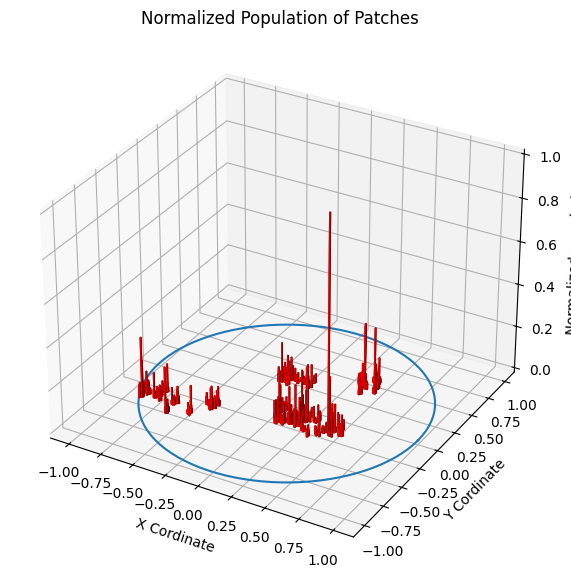

In [80]:
#### Results
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

ax.bar3d(x,y,np.zeros(len(populations)),0.01,0.01,normalized_population,color='red')
ax.plot(cx,cy)
ax.set_title("Normalized Population of Patches")
ax.set_xlabel('X Cordinate')
ax.set_ylabel('Y Cordinate')
ax.set_zlabel("Normalized population")
plt.show()